<a id = '1.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color :#4682B4; border-radius: 5px 5px;"><strong>Google Play Store Apps</strong></p>


<img src="https://www.opticflux.com/wp-content/uploads/2021/05/Google-Play-Store.jpg" alt="Google Play Store (Android TV) Version 25.1.24 Improves Its Features -  Optic Flux" jsname="HiaYvf" jsaction="load:XAeZkd;" class="n3VNCb" data-noaft="1" style="margin-left: 10%; float: center;  border:5px solid ; width:70%; height : 80%;">

* Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today.

<a id = '0.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Table of Contents</strong></p> 

* [Importing libraries](#1.0)
* [Importing dataset](#2.0)
* [Basic Data Exploration(Understanding the Dataset](#3.0)
* [Data Cleaning](#0.0)
    * [Checking for null values](#5.0)
    * [delete data duplicated](#6.0)
    * [Check Qutliers](#7.0)
* [Exploratory Data Analysis (EDA)](#8.0)
* [Check Co-relation](#9.0)

<a id = '1.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Importing libraries</strong></p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from wordcloud import WordCloud
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

<a id = '2.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Importing dataset </strong></p>

In [2]:
data=pd.read_csv('../input/google-play-store-apps/googleplaystore.csv')

<a id = '3.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Basic Data Exploration(Understanding the Dataset</strong></p>

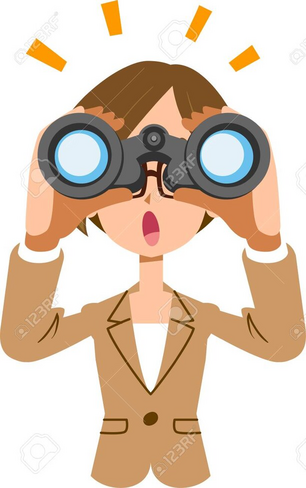

#### We will check the below things:

* head of the dataset
* the shape of the dataset
* datatypes for every column 
* summary of the dataset


In [3]:
data.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [4]:
# Take a sample of 5
data.sample(5)

App             Category  Rating Reviews  \
8558  Convert Coordinates DM to DMS  MAPS_AND_NAVIGATION     4.3      15   
3773               World Newspapers   NEWS_AND_MAGAZINES     4.4  185884   
5873                       Kids A-Z               FAMILY     4.2   26426   
1102         Monefy - Money Manager              FINANCE     4.6  111254   
7311                          My CG         PRODUCTIVITY     NaN       0   

                    Size    Installs  Type Price Content Rating  \
8558                164k      5,000+  Free     0       Everyone   
3773                7.5M  1,000,000+  Free     0     Mature 17+   
5873                 30M  1,000,000+  Free     0       Everyone   
1102                7.4M  1,000,000+  Free     0       Everyone   
7311  Varies with device         10+  Free     0           Teen   

                   Genres        Last Updated         Current Ver  \
8558    Maps & Navigation    February 3, 2013                 1.6   
3773     News & Magazines  September 17, 2017               3.1.9   
5873  Education;Education      August 2, 2018               4.1.0   
1102              Finance        July 3, 2018               1.8.9   
7311         Productivity      August 2, 2018  Varies with device   

             Android Ver  
8558          2.2 and up  
3773          4.1 and up  
5873          4.4 and up  
1102          4.0 and up  
7311  Varies with device

In [5]:
data.shape

(10841, 13)

In [6]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
#The described method will help to see how data has been spread for numerical values.
# We can clearly see the minimum value, mean values, different percentile values, and maximum values.
data.describe(include='all').T

count unique                 top   freq      mean       std  \
App              10841   9660              ROBLOX      9       NaN       NaN   
Category         10841     34              FAMILY   1972       NaN       NaN   
Rating          9367.0    NaN                 NaN    NaN  4.193338  0.537431   
Reviews          10841   6002                   0    596       NaN       NaN   
Size             10841    462  Varies with device   1695       NaN       NaN   
Installs         10841     22          1,000,000+   1579       NaN       NaN   
Type             10840      3                Free  10039       NaN       NaN   
Price            10841     93                   0  10040       NaN       NaN   
Content Rating   10840      6            Everyone   8714       NaN       NaN   
Genres           10841    120               Tools    842       NaN       NaN   
Last Updated     10841   1378      August 3, 2018    326       NaN       NaN   
Current Ver      10833   2832  Varies with device   1459       NaN       NaN   
Android Ver      10838     33          4.1 and up   2451       NaN       NaN   

                min  25%  50%  75%   max  
App             NaN  NaN  NaN  NaN   NaN  
Category        NaN  NaN  NaN  NaN   NaN  
Rating          1.0  4.0  4.3  4.5  19.0  
Reviews         NaN  NaN  NaN  NaN   NaN  
Size            NaN  NaN  NaN  NaN   NaN  
Installs        NaN  NaN  NaN  NaN   NaN  
Type            NaN  NaN  NaN  NaN   NaN  
Price           NaN  NaN  NaN  NaN   NaN  
Content Rating  NaN  NaN  NaN  NaN   NaN  
Genres          NaN  NaN  NaN  NaN   NaN  
Last Updated    NaN  NaN  NaN  NaN   NaN  
Current Ver     NaN  NaN  NaN  NaN   NaN  
Android Ver     NaN  NaN  NaN  NaN   NaN

In [8]:
#info() is used to check the Information about the data and the datatypes of each respective attribute.
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


* The data has 12 object and 1 numeric feature

#### we need to convert [`Reviews` & `Size`  &  `Installs` & `Price`] to int
* [Reviews](#11.0)
* [Size](#12.0)
* [Installs](#13.0) &  [Price](#14.0)

#### we need to Change Last update into a datetime column



* [Reviews](#1.0)


# Checking if all values in number of Reviews numeric
data.Reviews.str.isnumeric().sum()


* One value is non numeric out of 10841. Lets find its value and id.


In [9]:
data[~data.Reviews.str.isnumeric()]

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

* We could have converted it into interger like we did for Size but the data for this App looks different. It can be noticed that the entries are entered wrong  We could fix it by setting Category as nan and shifting all the values, but deleting the sample for now.

In [10]:
data=data.drop(data.index[10472])

In [11]:
data["Reviews"] = data["Reviews"].astype(int)

In [12]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


* [Size](#12.0)

* It can be seen that data has metric prefixes (Kilo and Mega) along with another string. Replacing k and M with their values to convert values to numeric.

In [13]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

* Remove all characters from size and convert it to float

In [14]:
data['Size']=data['Size'].str.replace('M','000')
data['Size']=data['Size'].str.replace('k','')
#apps['size']=apps['size'].str.replace('.','')
data['Size']=data['Size'].replace("Varies with device",np.nan)
data['Size']=data['Size'].astype('float')
data['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

* There is a problem!! There are some applications size in megabyte and some in kilobyte


In [15]:
###### Convert mega to kilo then convert all to mega
for i in data['Size']:
    if i < 10:
        data['Size']=data['Size'].replace(i,i*1000)
data['Size']=data['Size']/1000
data['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10840, dtype: float64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


* [Installs](#13.0) &  [Price](#13.0)


In [17]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [18]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [19]:
items_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in items_to_remove:
    for col in cols_to_clean:
        data[col]=data[col].str.replace(item,'')
data.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type Price Content Rating  \
0      159  19.0     10000  Free     0       Everyone   
1      967  14.0    500000  Free     0       Everyone   
2    87510   8.7   5000000  Free     0       Everyone   
3   215644  25.0  50000000  Free     0           Teen   
4      967   2.8    100000  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [20]:
data.Installs.unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [21]:
data['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [22]:
data[data['Price']=='Everyone']

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

In [23]:
data['Installs']=data['Installs'].astype('int')
data['Price']=data['Price'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


* [last updated](#12.0)

In [24]:
#### Change Last update into a datetime column
data['Last Updated'] = pd.to_datetime(data['Last Updated'])
data['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [25]:
data['Updated_Day']=data['Last Updated'].dt.day
data['Updated_Month']=data['Last Updated'].dt.month
data['Updated_Year']=data['Last Updated'].dt.year

In [26]:
data.drop('Last Updated', axis=1, inplace=True)

In [27]:
data.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type  Price Content Rating  \
0      159  19.0     10000  Free    0.0       Everyone   
1      967  14.0    500000  Free    0.0       Everyone   
2    87510   8.7   5000000  Free    0.0       Everyone   
3   215644  25.0  50000000  Free    0.0           Teen   
4      967   2.8    100000  Free    0.0       Everyone   

                      Genres         Current Ver   Android Ver  Updated_Day  \
0               Art & Design               1.0.0  4.0.3 and up            7   
1  Art & Design;Pretend Play               2.0.0  4.0.3 and up           15   
2               Art & Design               1.2.4  4.0.3 and up            1   
3               Art & Design  Varies with device    4.2 and up            8   
4    Art & Design;Creativity                 1.1    4.4 and up           20   

   Updated_Month  Updated_Year  
0              1          2018  
1              1          2018  
2              8          2018  
3              6          2018  
4              6          2018

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Updated_Day     10840 non-null  int64  
 13  Updated_Month   10840 non-null  int64  
 14  Updated_Year    10840 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.3+ MB


<a id = '0.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #006400; border-radius: 5px 5px;"><strong>Data Cleaning</strong></p>


#### Garbage in Garbage out
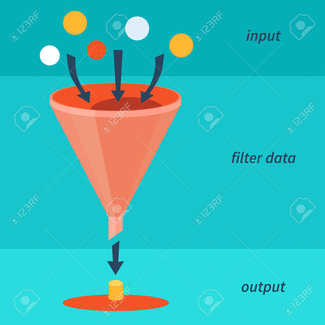

<a id = '5.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Checking for null values</strong></p>


In [29]:
null = pd.DataFrame({'Null Values' : data.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (data.isna().sum().sort_values(ascending=False)) / (data.shape[0]) * (100)})
null

Null Values  Percentage Null Values
Size                   1695               15.636531
Rating                 1474               13.597786
Current Ver               8                0.073801
Android Ver               2                0.018450
Type                      1                0.009225
App                       0                0.000000
Category                  0                0.000000
Reviews                   0                0.000000
Installs                  0                0.000000
Price                     0                0.000000
Content Rating            0                0.000000
Genres                    0                0.000000
Updated_Day               0                0.000000
Updated_Month             0                0.000000
Updated_Year              0                0.000000

<BarContainer object of 15 artists>

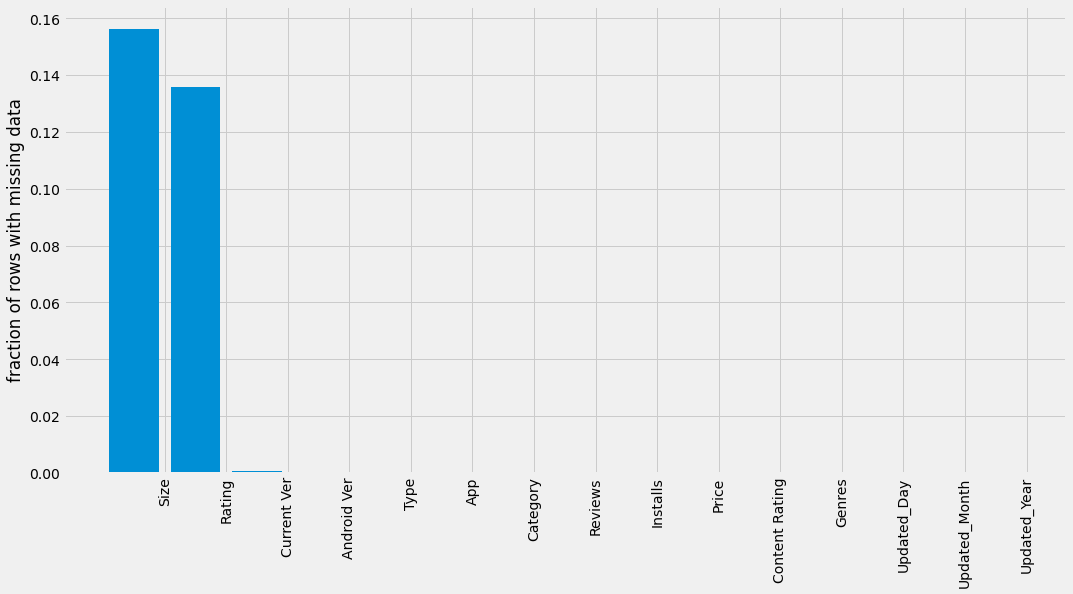

In [30]:
null_counts = data.isna().sum().sort_values(ascending=False)/len(data)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

* I Clean missing values using Random Value Imputation Because This the best way to To maintain distrbuation For each feature.

In [31]:
### lets create a function so that I can easily do it for all features
def Random_value_imputation(feature):
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum())               
    random_sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature]=random_sample

In [32]:
for col in data:
    Random_value_imputation(col)

In [33]:
null = pd.DataFrame({'Null Values' : data.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (data.isna().sum().sort_values(ascending=False)) / (data.shape[0]) * (100)})
null

Null Values  Percentage Null Values
App                       0                     0.0
Category                  0                     0.0
Rating                    0                     0.0
Reviews                   0                     0.0
Size                      0                     0.0
Installs                  0                     0.0
Type                      0                     0.0
Price                     0                     0.0
Content Rating            0                     0.0
Genres                    0                     0.0
Current Ver               0                     0.0
Android Ver               0                     0.0
Updated_Day               0                     0.0
Updated_Month             0                     0.0
Updated_Year              0                     0.0

<BarContainer object of 15 artists>

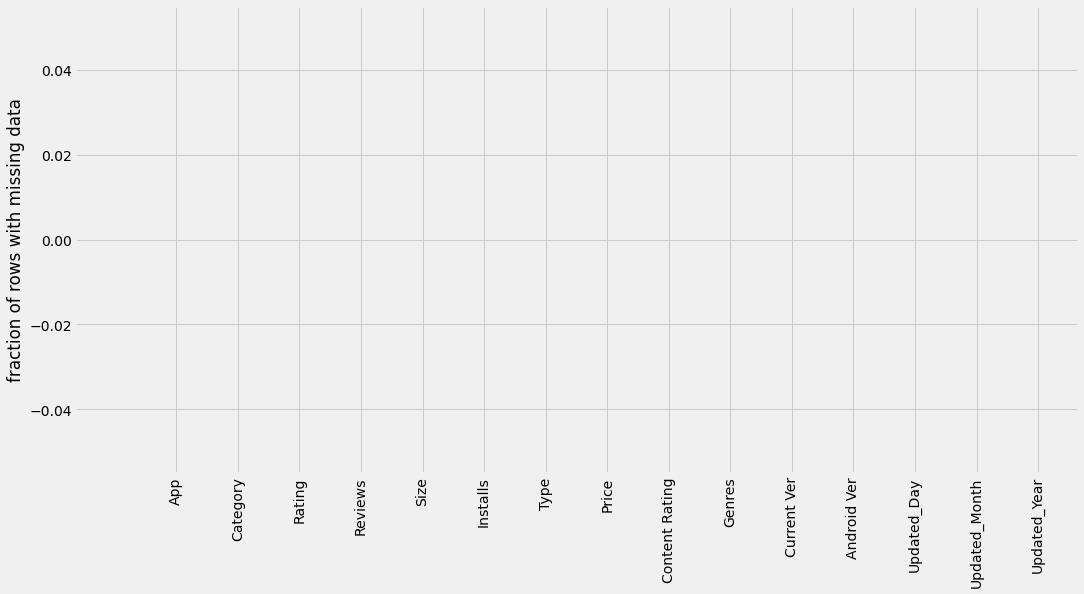

In [34]:
null_counts = data.isna().sum().sort_values(ascending=False)/len(data)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

<a id = '6.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>delete data duplicated</strong></p>

In [35]:
duplicate = data.duplicated()
print(duplicate.sum())

309


In [36]:
data.drop_duplicates(inplace=True)

In [37]:
duplicate = data.duplicated()
print(duplicate.sum())

0


<a id = '5.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong> Extract Numerical & Categorical Features</strong></p> 

In [38]:
num_features=[col for col in data.columns if data[col].dtype!='O']
num_features

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Updated_Day',
 'Updated_Month',
 'Updated_Year']

In [39]:
num_data = data[num_features]
num_data.head()

Rating  Reviews  Size  Installs  Price  Updated_Day  Updated_Month  \
0     4.1      159  19.0     10000    0.0            7              1   
1     3.9      967  14.0    500000    0.0           15              1   
2     4.7    87510   8.7   5000000    0.0            1              8   
3     4.5   215644  25.0  50000000    0.0            8              6   
4     4.3      967   2.8    100000    0.0           20              6   

   Updated_Year  
0          2018  
1          2018  
2          2018  
3          2018  
4          2018

In [40]:
cat_features=[col for col in data.columns if data[col].dtype=='O']
cat_features

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [41]:
categorical=data[cat_features]
categorical.head()

App        Category  Type  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN  Free   
1                                Coloring book moana  ART_AND_DESIGN  Free   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN  Free   
3                              Sketch - Draw & Paint  ART_AND_DESIGN  Free   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN  Free   

  Content Rating                     Genres         Current Ver   Android Ver  
0       Everyone               Art & Design               1.0.0  4.0.3 and up  
1       Everyone  Art & Design;Pretend Play               2.0.0  4.0.3 and up  
2       Everyone               Art & Design               1.2.4  4.0.3 and up  
3           Teen               Art & Design  Varies with device    4.2 and up  
4       Everyone    Art & Design;Creativity                 1.1    4.4 and up

<a id = '7.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Check Qutliers</strong></p>

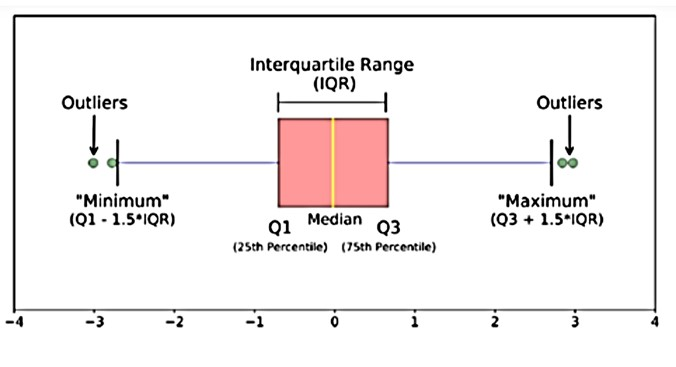

In [42]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [43]:
def has_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None):
        print(variable, "yes")
    print(variable, "no")

In [44]:
for col in num_data.columns:
    has_outliers(num_data, col)

Rating yes
Rating no
Reviews yes
Reviews no
Size no
Installs yes
Installs no
Price yes
Price no
Updated_Day no
Updated_Month no
Updated_Year yes
Updated_Year no


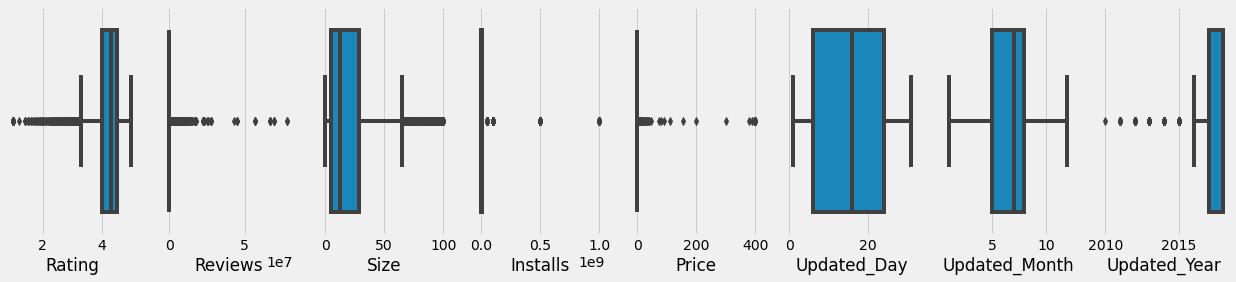

In [45]:
plt.figure(figsize=(22,18))
for i,col in enumerate(num_data.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_data[col])

In [46]:
## function to get ride of qutliers
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [47]:
replace_with_thresholds(num_data, num_data.columns)

In [48]:
for col in num_data.columns:
    has_outliers(num_data, col)

Rating no
Reviews no
Size no
Installs no
Price no
Updated_Day no
Updated_Month no
Updated_Year no


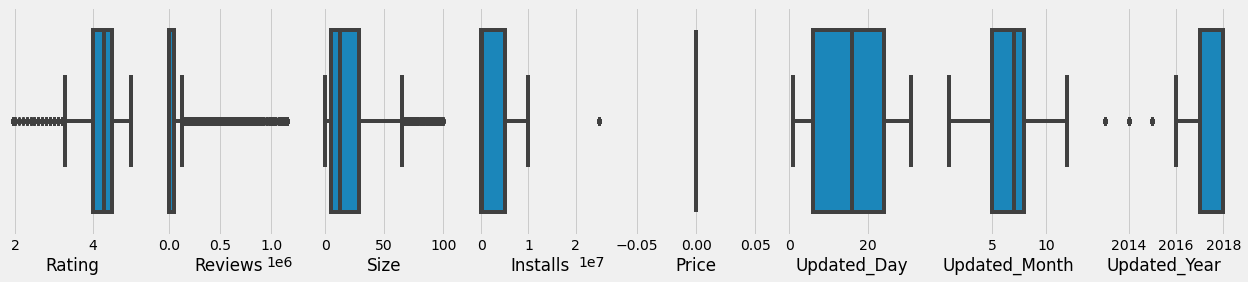

In [49]:
plt.figure(figsize=(22,18))
for i,col in enumerate(num_data.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_data[col])

<a id = '8.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Exploratory Data Analysis (EDA)</strong></p>

###  What is EDA ?
is an approach for data analysis that emeploys a variety of technics (mostly graphical) to  
*  maximize insight into a dataset
*   uncover underlying structure     
*   extract important variables      
*   answer questions 

### EDA Checklist
1. What question(s) are you trying to solve ? 
2. What kind of data do you have and how do you treat different types? 
3. What do you get after visualize your data?
4. What is your observation 

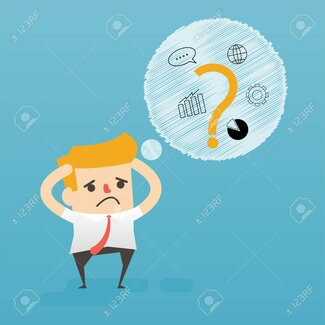

<a id = '8.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #008000; border-radius: 5px 5px;"><strong>Category Column</strong></p>

In [50]:
categorical['Category'].value_counts()

FAMILY                 1946
GAME                   1129
TOOLS                   843
BUSINESS                438
PRODUCTIVITY            420
MEDICAL                 416
PERSONALIZATION         391
COMMUNICATION           382
LIFESTYLE               375
SPORTS                  369
FINANCE                 363
PHOTOGRAPHY             324
HEALTH_AND_FITNESS      317
SOCIAL                  287
NEWS_AND_MAGAZINES      275
TRAVEL_AND_LOCAL        245
SHOPPING                240
BOOKS_AND_REFERENCE     230
DATING                  201
VIDEO_PLAYERS           175
EDUCATION               141
MAPS_AND_NAVIGATION     137
ENTERTAINMENT           126
FOOD_AND_DRINK          125
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
HOUSE_AND_HOME           82
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY'),
  Text(28, 0, 'PARENTING'),
  Text(

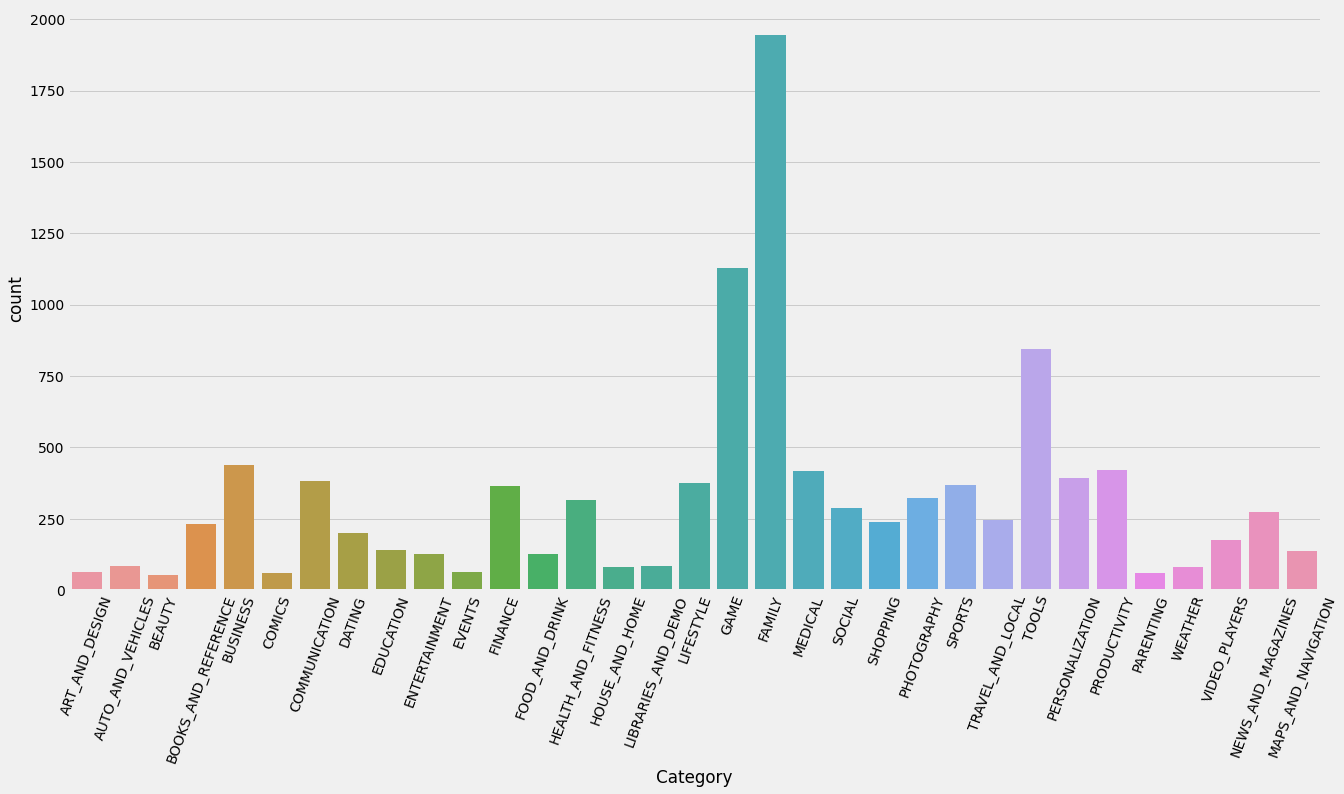

In [51]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Category',data=data)
plt.xticks(rotation=70)

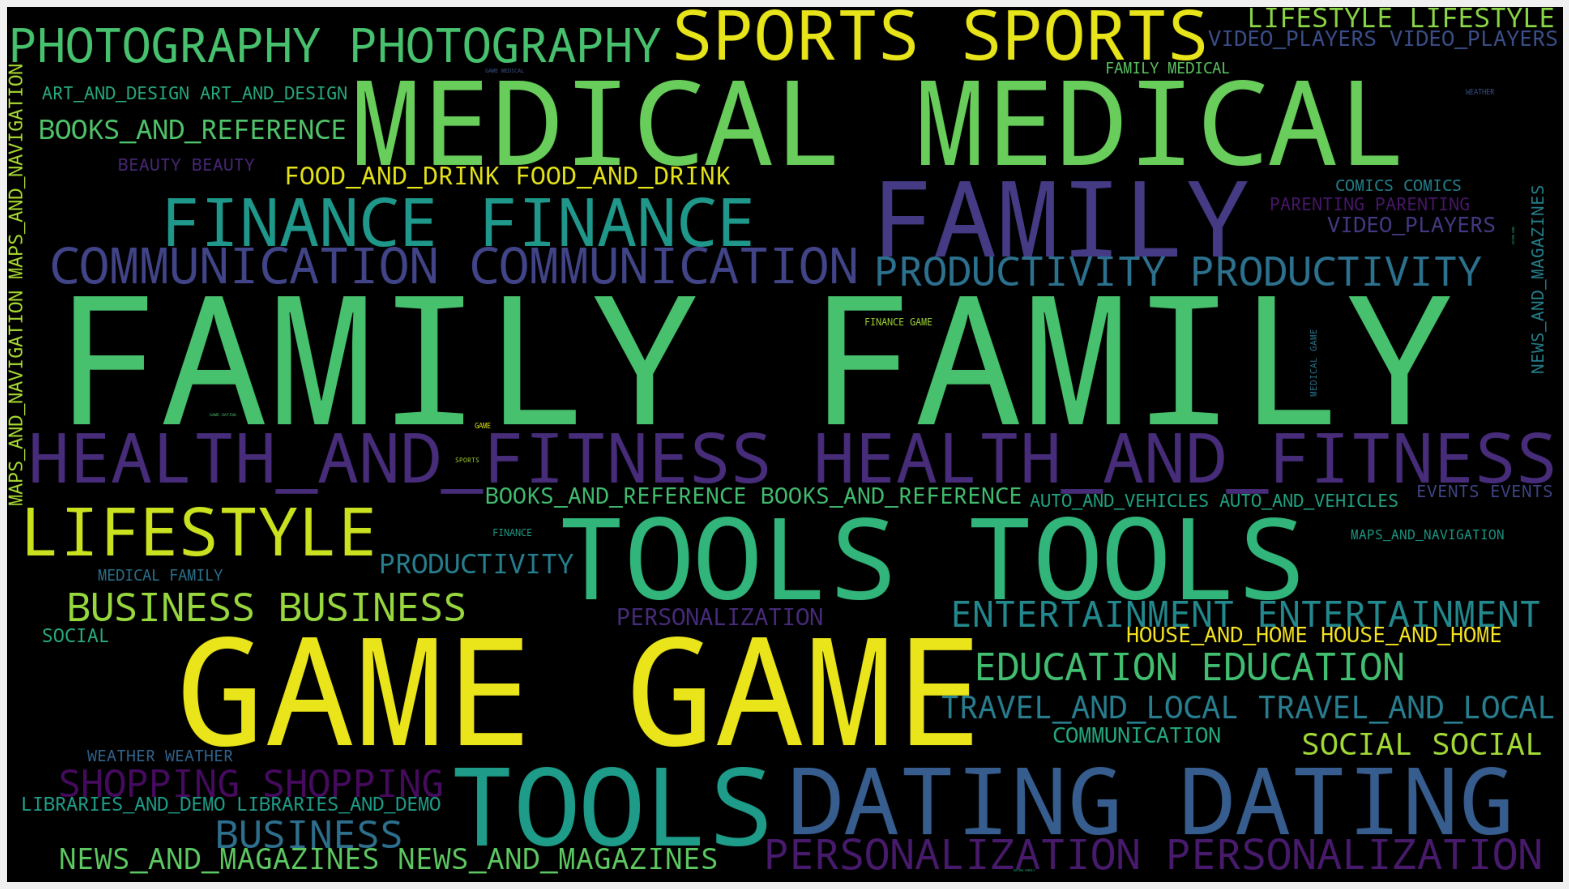

In [52]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data.Category))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [53]:
Category1 = data[data.Category=="GAME"].Rating
Category2 = data[data.Category=="FAMILY"].Rating
Category3 = data[data.Category=="MEDICAL"].Rating

fig = go.Figure()
fig.add_trace(go.Box(x=Category1, name='GAME'))
fig.add_trace(go.Box(x=Category2, name='FAMILY'))
fig.add_trace(go.Box(x=Category3, name='MEDICAL'))

fig.show()

### Category vs Rating Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'FAMILY'),
  Text(1, 0, 'DATING'),
  Text(2, 0, 'SHOPPING'),
  Text(3, 0, 'EVENTS'),
  Text(4, 0, 'GAME'),
  Text(5, 0, 'VIDEO_PLAYERS'),
  Text(6, 0, 'LIFESTYLE'),
  Text(7, 0, 'MEDICAL'),
  Text(8, 0, 'PHOTOGRAPHY'),
  Text(9, 0, 'HEALTH_AND_FITNESS'),
  Text(10, 0, 'FINANCE'),
  Text(11, 0, 'TRAVEL_AND_LOCAL'),
  Text(12, 0, 'COMICS'),
  Text(13, 0, 'BOOKS_AND_REFERENCE'),
  Text(14, 0, 'COMMUNICATION'),
  Text(15, 0, 'PRODUCTIVITY'),
  Text(16, 0, 'BUSINESS'),
  Text(17, 0, 'TOOLS'),
  Text(18, 0, 'SOCIAL'),
  Text(19, 0, 'SPORTS'),
  Text(20, 0, 'PERSONALIZATION'),
  Text(21, 0, 'NEWS_AND_MAGAZINES'),
  Text(22, 0, 'FOOD_AND_DRINK'),
  Text(23, 0, 'ART_AND_DESIGN'),
  Text(24, 0, 'MAPS_AND_NAVIGATION'),
  Text(25, 0, 'LIBRARIES_AND_DEMO'),
  Text(26, 0, 'PARENTING'),
  Text(27, 0, 'AUTO_AND_VEHICLES'),
  Text(28, 0, 'BEA

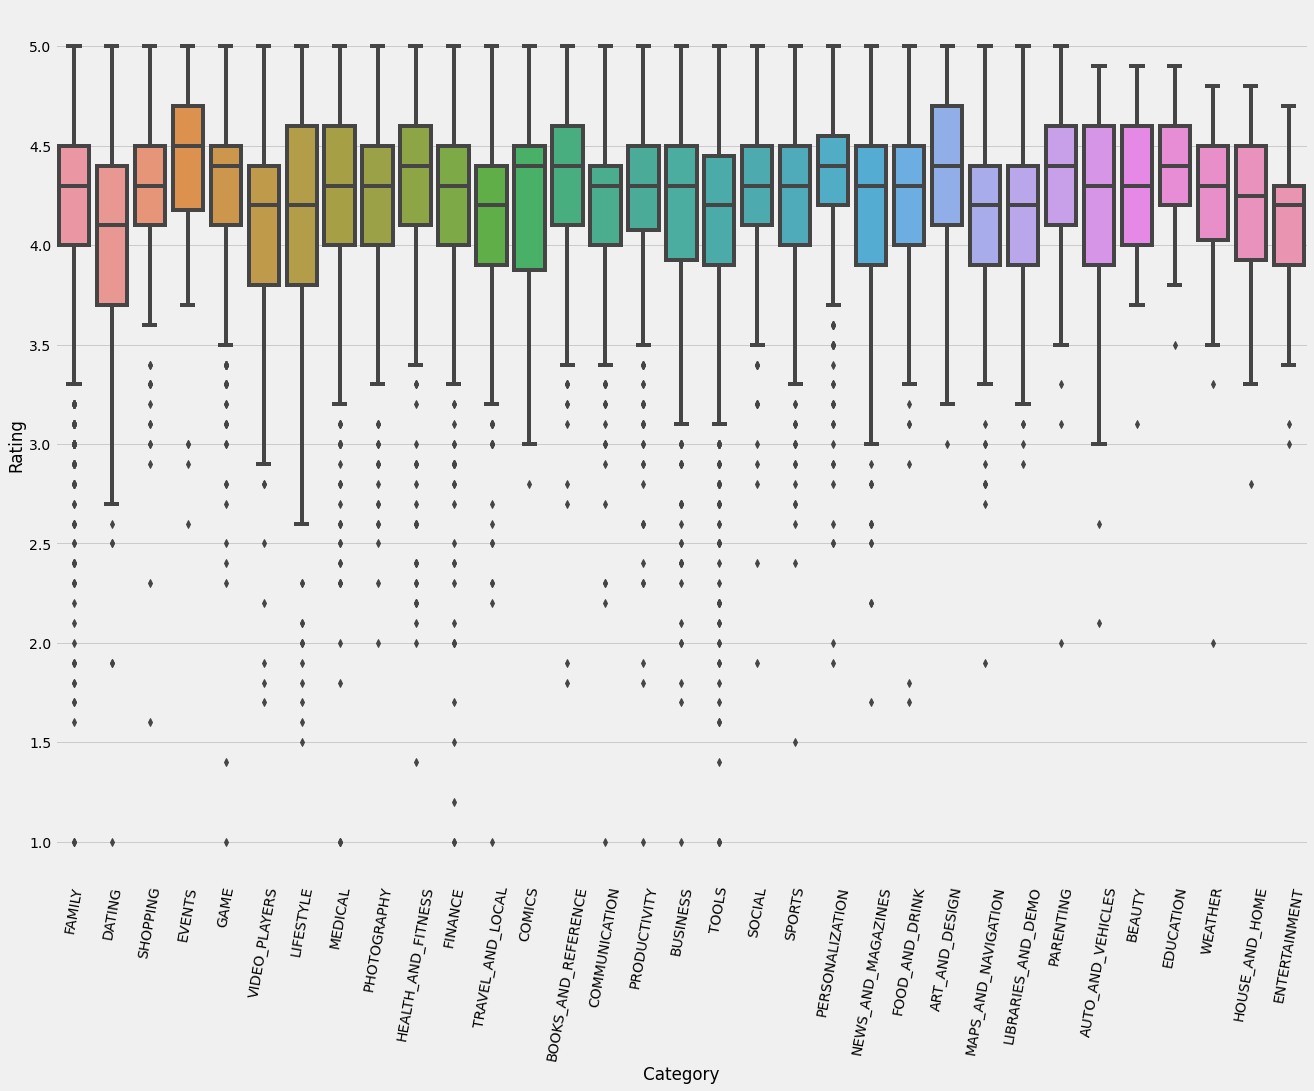

In [54]:
plt.figure(figsize=(20,15))
sns.boxplot(y='Rating',x='Category',data = data.sort_values('Rating',ascending=False))
plt.xticks(rotation=80)

<a id = '8.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #008000; border-radius: 5px 5px;"><strong>Type Column</strong></p>

In [55]:
categorical['Type'].value_counts()

Free    9763
Paid     768
Name: Type, dtype: int64

(array([0, 1]), [Text(0, 0, 'Free'), Text(1, 0, 'Paid')])

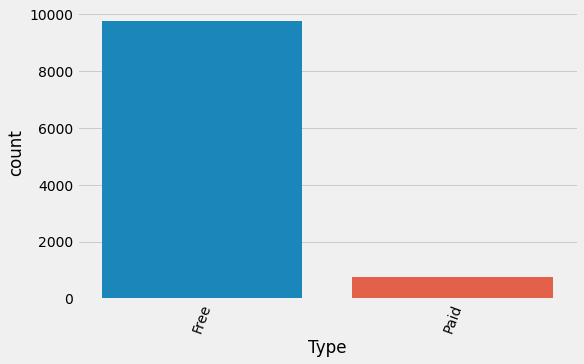

In [56]:
plt.rcParams['figure.figsize'] = (8,5)
sns.countplot(x='Type',data=data)
plt.xticks(rotation=70)

<AxesSubplot:ylabel='Type'>

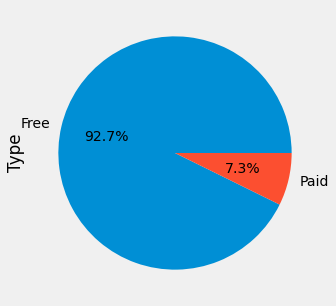

In [57]:
data["Type"].value_counts().plot.pie(autopct = "%1.1f%%")

### Type vs Rating Analysis

<Figure size 1080x576 with 0 Axes>

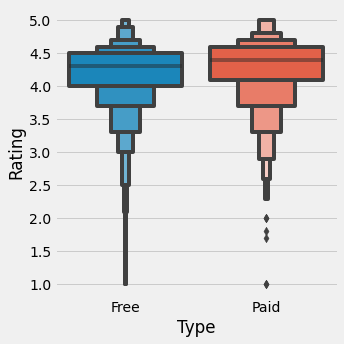

In [58]:
plt.figure(figsize=(15,8))
sns.catplot(y='Rating',x='Type',data = data.sort_values('Rating',ascending=False),kind='boxen')

<a id = '8.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #008000; border-radius: 5px 5px;"><strong>Content Rating Column</strong></p>

In [59]:
categorical['Content Rating'].value_counts()

Everyone           8499
Teen               1172
Mature 17+          461
Everyone 10+        394
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Everyone'),
  Text(1, 0, 'Teen'),
  Text(2, 0, 'Everyone 10+'),
  Text(3, 0, 'Mature 17+'),
  Text(4, 0, 'Adults only 18+'),
  Text(5, 0, 'Unrated')])

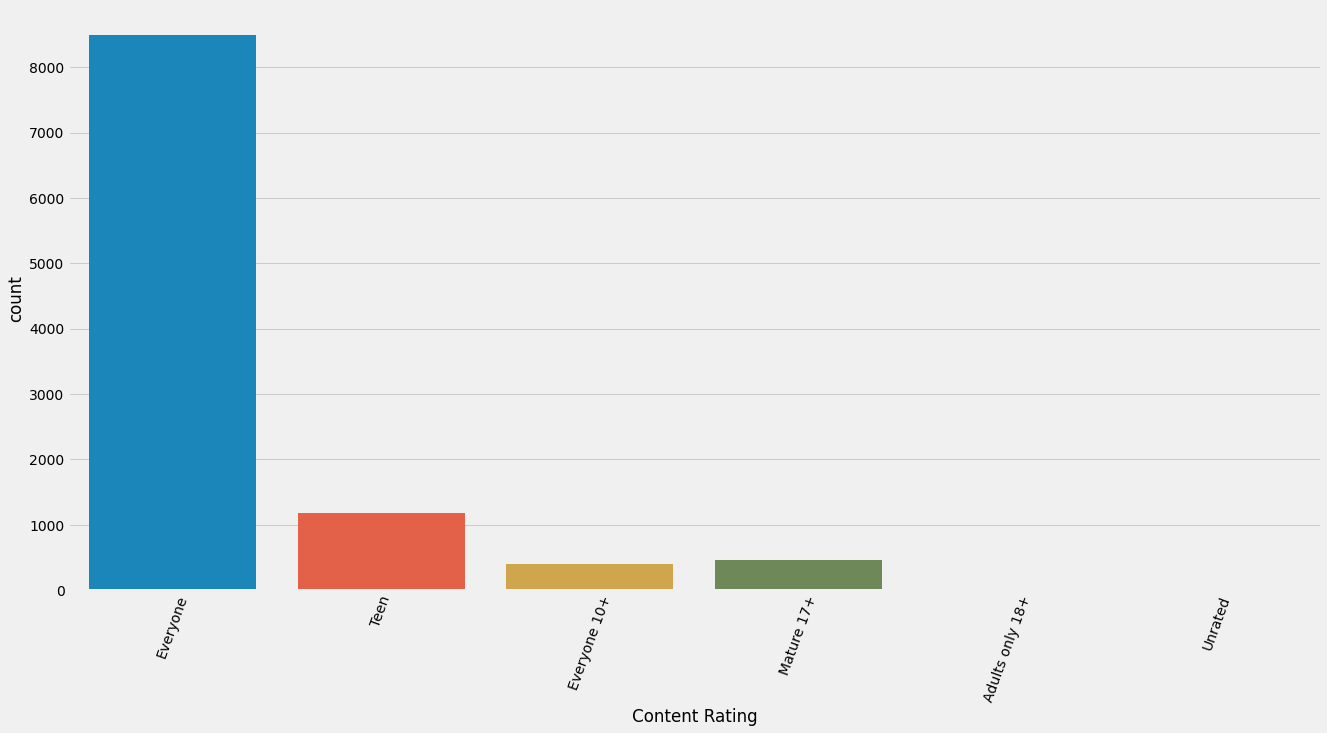

In [60]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Content Rating',data=data)
plt.xticks(rotation=70)

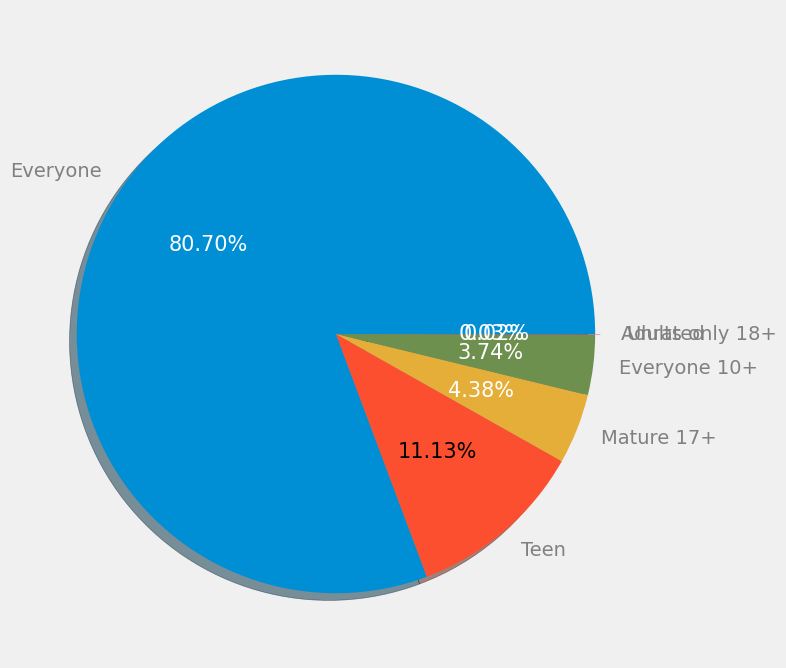

In [61]:
# pie chart
values = data['Content Rating'].value_counts()
labels = ['Everyone', 'Teen', 'Mature 17+','Everyone 10+','Adults only 18+','Unrated']

fig, ax = plt.subplots(figsize = (12, 8), dpi = 100)
explode = (0,0,0,0,0,.02)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 0, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 15, color = 'white')
autotexts[1].set_color('black')
plt.show()

### Content Rating vs Rating Analysis

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Everyone'),
  Text(1, 0, 'Mature 17+'),
  Text(2, 0, 'Teen'),
  Text(3, 0, 'Everyone 10+'),
  Text(4, 0, 'Unrated'),
  Text(5, 0, 'Adults only 18+')])

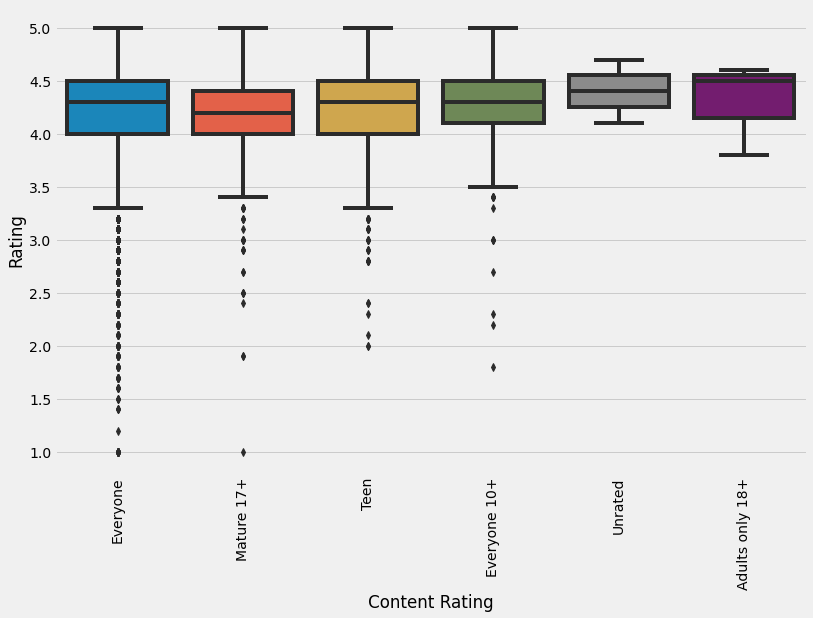

In [62]:
plt.figure(figsize=(12,8))
sns.boxplot(y='Rating',x='Content Rating',data = data.sort_values('Rating',ascending=False))
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Content Rating', ylabel='Installs'>

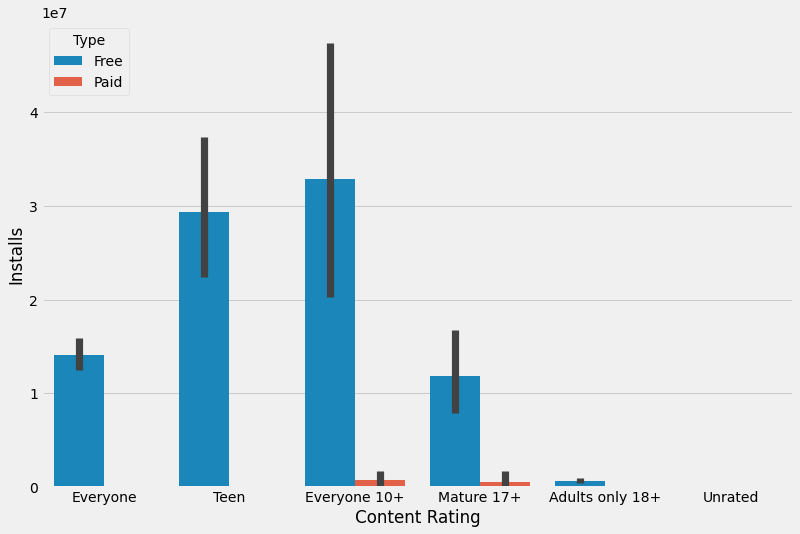

In [63]:
plt.figure(figsize=(12,8))
sns.barplot(x="Content Rating", y="Installs", hue="Type", data=data)

<a id = '8.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #008000; border-radius: 5px 5px;"><strong>Genres Column</strong></p>

In [64]:
categorical['Genres'].value_counts()

Tools                                842
Entertainment                        603
Education                            536
Business                             438
Productivity                         420
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Lifestyle;Pretend Play                 1
Tools;Education                        1
Strategy;Creativity                    1
Name: Genres, Length: 119, dtype: int64

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118]),
 [Text(0, 0, 'Art & Design'),
  Text(1, 0, 'Art & Design;Pretend Play'),
  Text(2, 0, 'Art & Design;Creativity'),
  Text(3, 0, 'Art & Design;Action & Adventure'),
  Text(4, 0, 'Auto & Vehicles'),
  Text(5, 0, 'Beauty'),
  Text(6, 0, 'Books & Reference'),
  Text(7, 0, 'Business'),
  Text(8, 0, 'Comics'),
  Text(9, 0, 'Comi

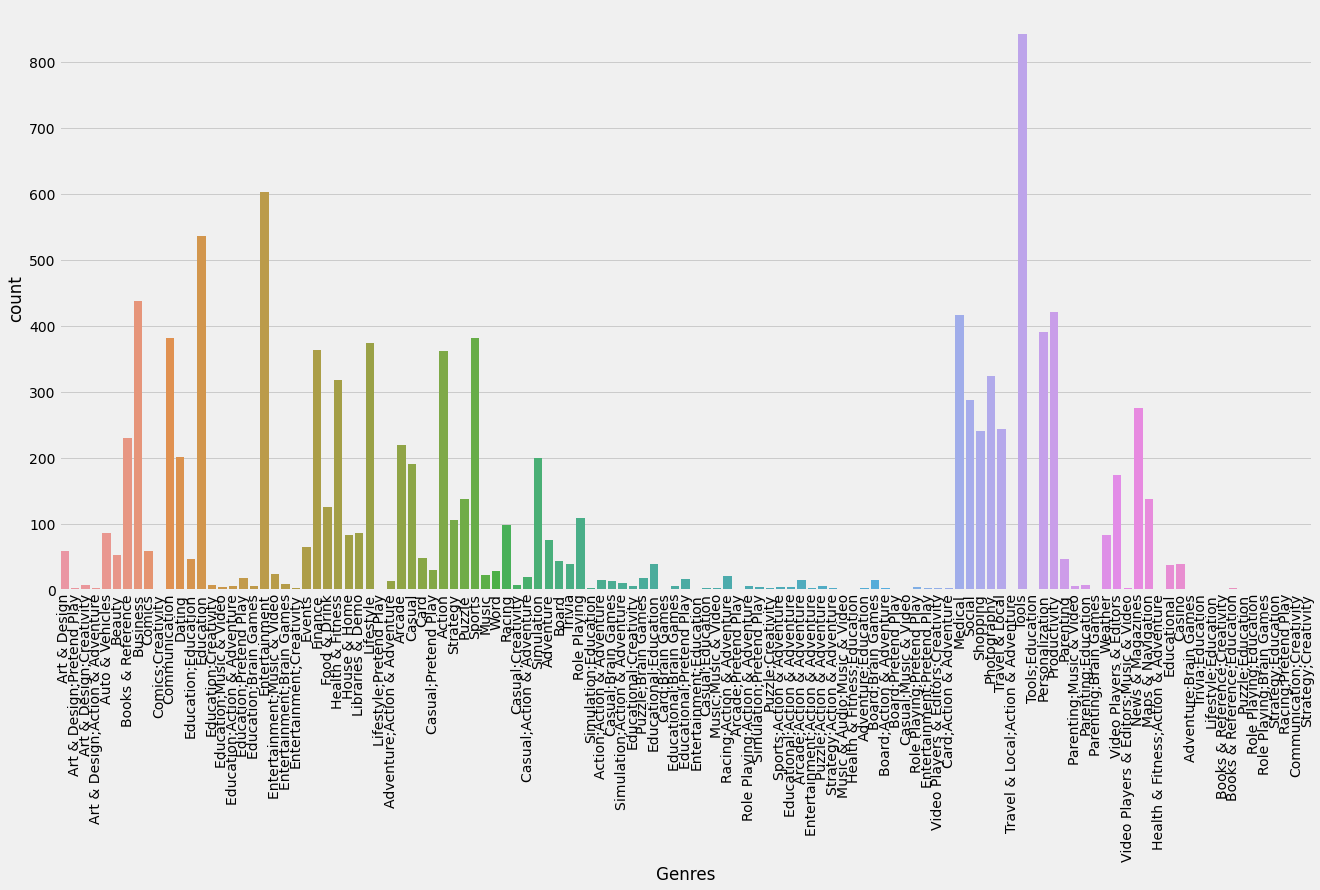

In [65]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Genres',data=data)
plt.xticks(rotation=90)

### Content Rating vs Genres Analysis

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118]),
 [Text(0, 0, 'Education'),
  Text(1, 0, 'Entertainment'),
  Text(2, 0, 'Dating'),
  Text(3, 0, 'Shopping'),
  Text(4, 0, 'Events'),
  Text(5, 0, 'Music'),
  Text(6, 0, 'Arcade'),
  Text(7, 0, 'Video Players & Editors'),
  Text(8, 0, 'Lifestyle'),
  Text(9, 0, 'Medical'),
  Text(10, 0, 'Photography'),
  Text(11, 0, 'Health

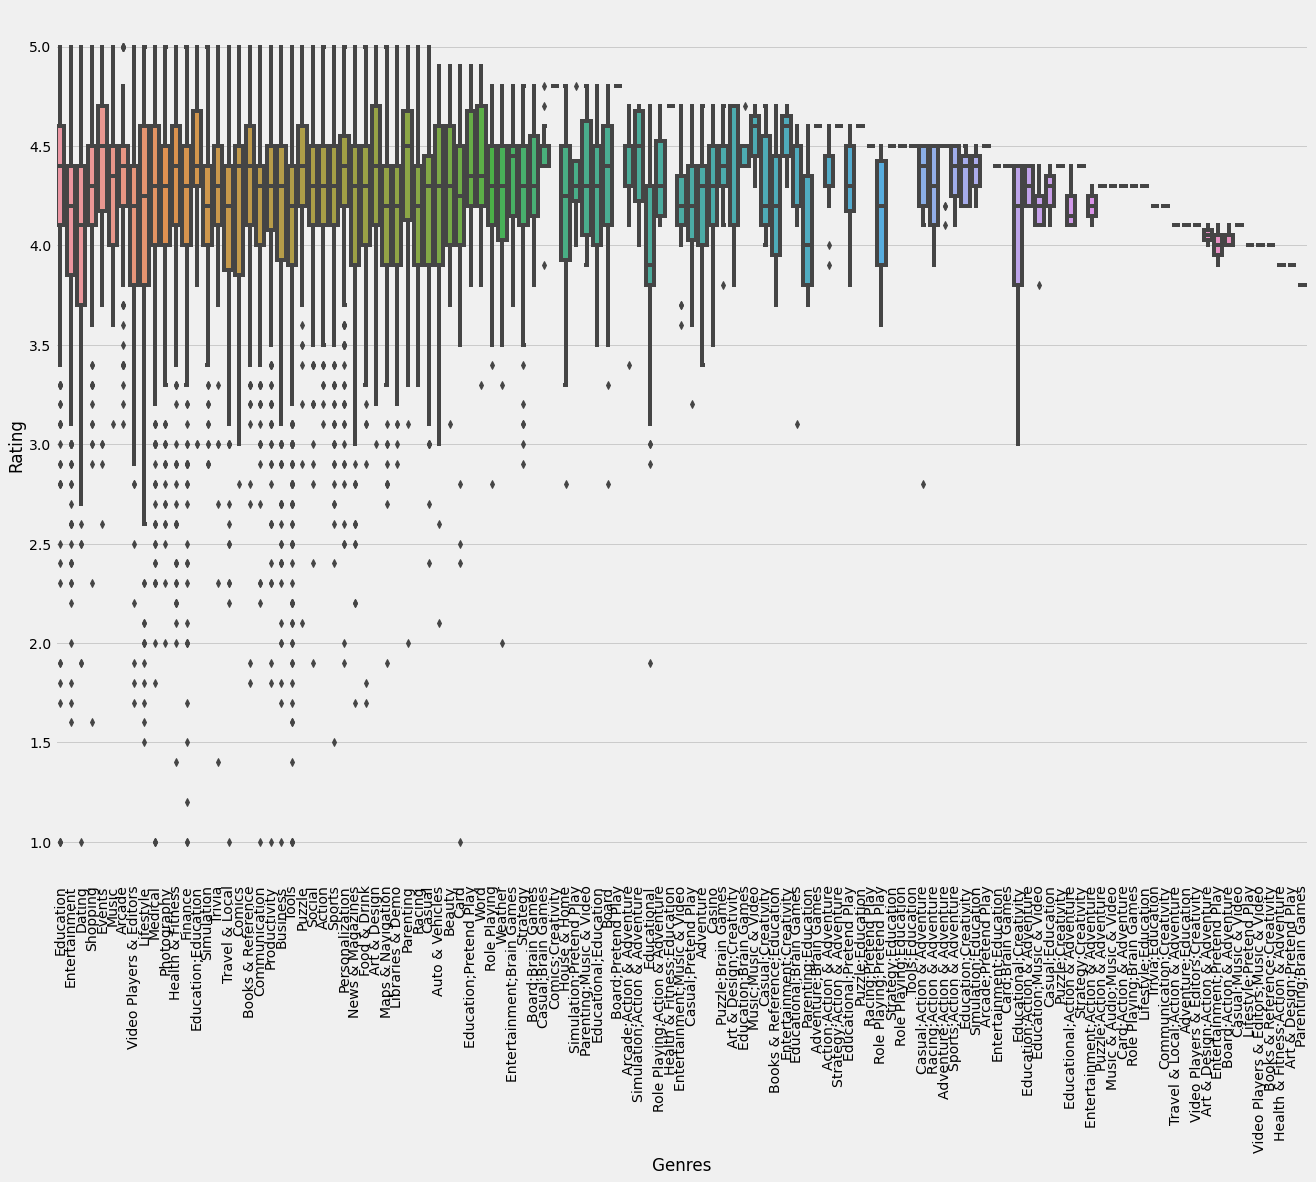

In [66]:
plt.figure(figsize=(20,15))
sns.boxplot(y='Rating',x='Genres',data = data.sort_values('Rating',ascending=False))
plt.xticks(rotation=90)

<a id = '8.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #008000; border-radius: 5px 5px;"><strong>Current Ver Column</strong></p>

In [67]:
categorical['Current Ver'].value_counts()

Varies with device    1453
1.0                    803
1.1                    261
1.2                    178
2.0                    149
                      ... 
4.1.11 - Hegoa           1
12.2.7.3671              1
8.50.935520              1
1.8.4.5                  1
2.0.148.0                1
Name: Current Ver, Length: 2831, dtype: int64

<a id = '8.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #008000; border-radius: 5px 5px;"><strong>Android Ver Column</strong></p>

In [68]:
categorical['Android Ver'].value_counts()

4.1 and up            2386
4.0.3 and up          1461
Varies with device    1357
4.0 and up            1338
4.4 and up             904
2.3 and up             644
5.0 and up             557
4.2 and up             387
2.3.3 and up           279
2.2 and up             239
3.0 and up             237
4.3 and up             235
2.1 and up             133
1.6 and up             116
6.0 and up              58
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, '4.0.3 and up'),
  Text(1, 0, '4.2 and up'),
  Text(2, 0, '4.4 and up'),
  Text(3, 0, '2.3 and up'),
  Text(4, 0, '3.0 and up'),
  Text(5, 0, '4.1 and up'),
  Text(6, 0, '4.0 and up'),
  Text(7, 0, '2.3.3 and up'),
  Text(8, 0, 'Varies with device'),
  Text(9, 0, '2.2 and up'),
  Text(10, 0, '5.0 and up'),
  Text(11, 0, '6.0 and up'),
  Text(12, 0, '1.6 and up'),
  Text(13, 0, '1.5 and up'),
  Text(14, 0, '2.1 and up'),
  Text(15, 0, '7.0 and up'),
  Text(16, 0, '5.1 and up'),
  Text(17, 0, '4.3 and up'),
  Text(18, 0, '4.0.3 - 7.1.1'),
  Text(19, 0, '2.0 and up'),
  Text(20, 0, '3.2 and up'),
  Text(21, 0, '4.4W and up'),
  Text(22, 0, '7.1 and up'),
  Text(23, 0, '7.0 - 7.1.1'),
  Text(24, 0, '8.0 and up'),
  Text(25, 0, '5.0 - 8.0'),
  Text(26, 0, '3.1 and up'),
  Text(27, 0, '2.0.1 and up'),
  Text(28, 0, '4.1 - 7.1.1'),


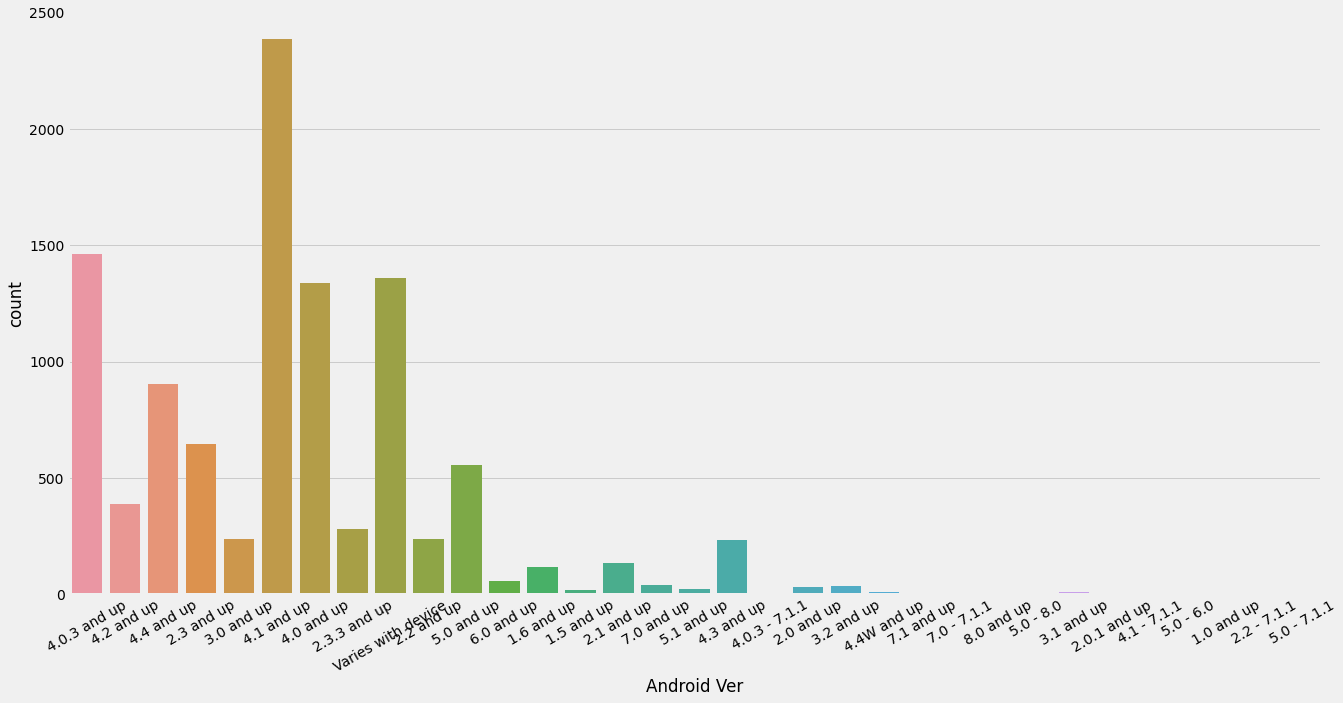

In [69]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Android Ver',data=data)
plt.xticks(rotation=30)

### Content Rating vs Android Ver Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, '4.0.3 and up'),
  Text(1, 0, '4.0 and up'),
  Text(2, 0, '4.4 and up'),
  Text(3, 0, '4.1 and up'),
  Text(4, 0, '2.0 and up'),
  Text(5, 0, '5.0 and up'),
  Text(6, 0, '4.3 and up'),
  Text(7, 0, '4.2 and up'),
  Text(8, 0, '2.3.3 and up'),
  Text(9, 0, '1.6 and up'),
  Text(10, 0, '3.0 and up'),
  Text(11, 0, '2.0.1 and up'),
  Text(12, 0, '8.0 and up'),
  Text(13, 0, '2.1 and up'),
  Text(14, 0, 'Varies with device'),
  Text(15, 0, '2.2 and up'),
  Text(16, 0, '5.1 and up'),
  Text(17, 0, '2.3 and up'),
  Text(18, 0, '7.0 and up'),
  Text(19, 0, '3.2 and up'),
  Text(20, 0, '6.0 and up'),
  Text(21, 0, '1.5 and up'),
  Text(22, 0, '3.1 and up'),
  Text(23, 0, '2.2 - 7.1.1'),
  Text(24, 0, '5.0 - 7.1.1'),
  Text(25, 0, '7.1 and up'),
  Text(26, 0, '5.0 - 8.0'),
  Text(27, 0, '5.0 - 6.0'),
  Text(28, 0, '4.4W and up'),
  Te

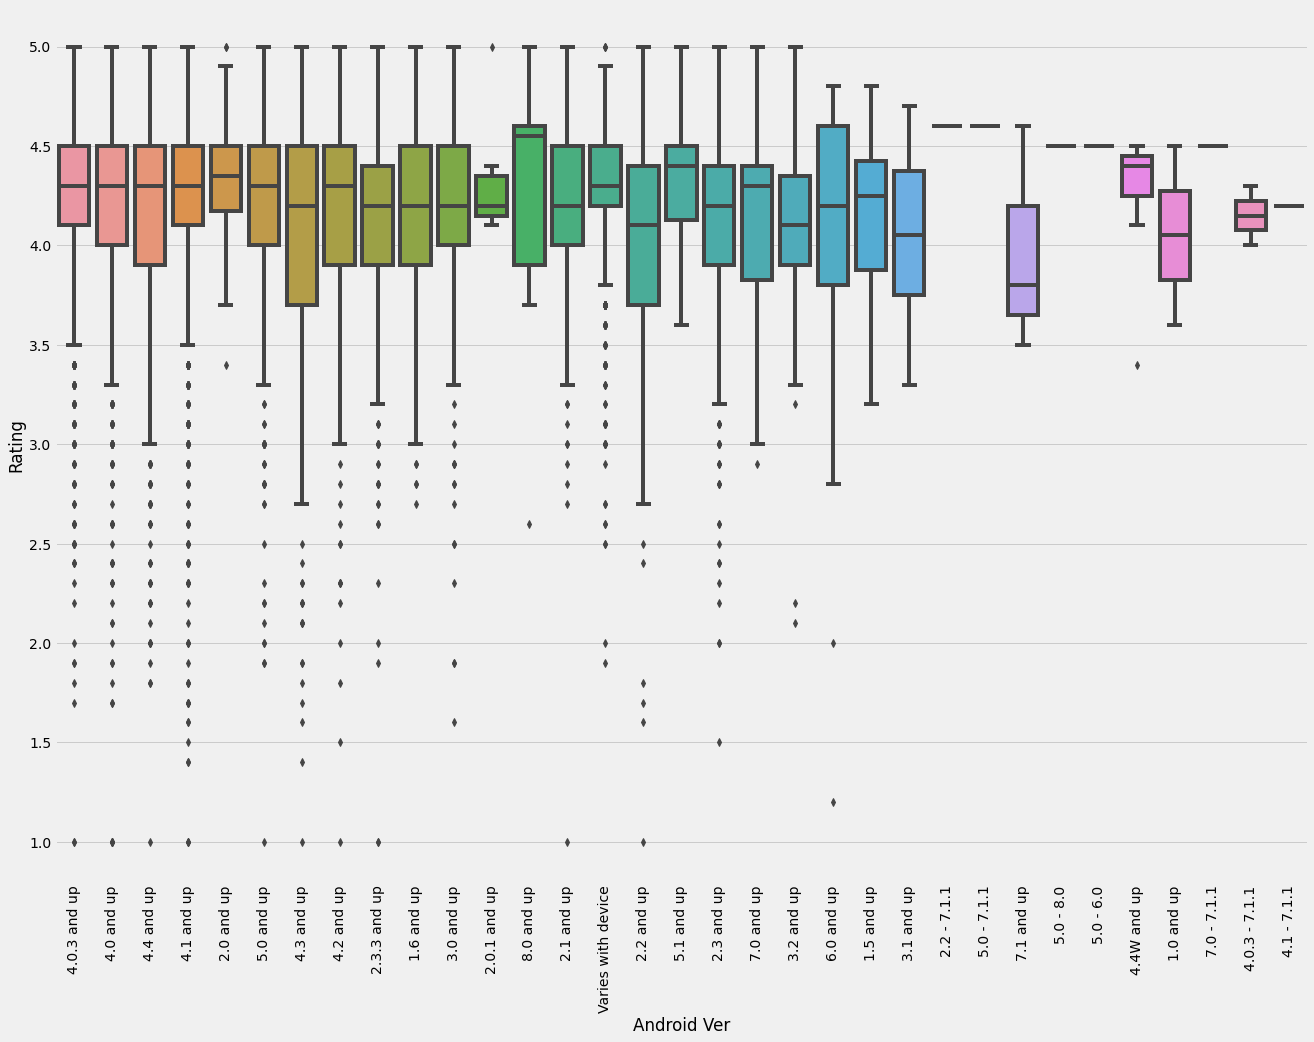

In [70]:
plt.figure(figsize=(20,15))
sns.boxplot(y='Rating',x='Android Ver',data = data.sort_values('Rating',ascending=False))
plt.xticks(rotation=90)

### Defining violin and scatter plot & kde_plot functions

In [71]:
def violin(col):
    fig = px.violin(data, y=col, x="Type", color="Type", box=True , template = 'plotly_dark')
    return fig.show()

def scatters(col1,col2):
    fig = px.scatter(data, x=col1, y=col2, color="Type" ,template = 'plotly_dark')
    return fig.show()

def kde_plot(feature):
    grid = sns.FacetGrid(data, hue="Type",aspect=2)
    grid.map(sns.kdeplot, feature)
    grid.add_legend()

* kde_plot Analysis

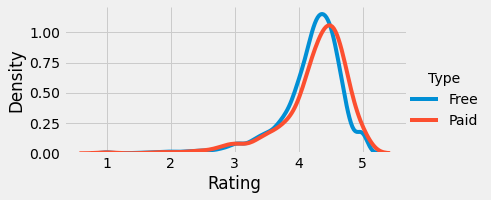

In [72]:
kde_plot('Rating')

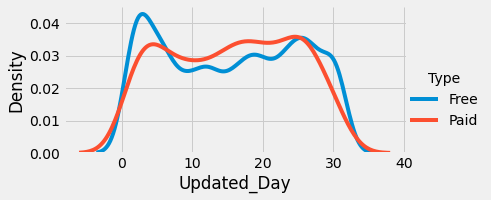

In [73]:
kde_plot('Updated_Day')

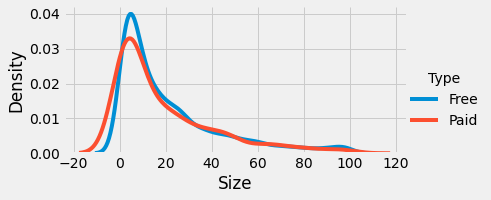

In [74]:
kde_plot('Size')

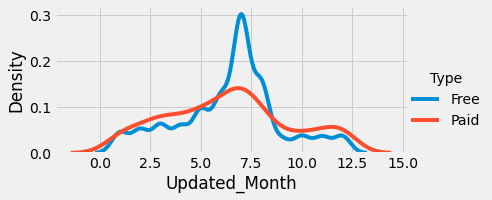

In [75]:
kde_plot('Updated_Month')

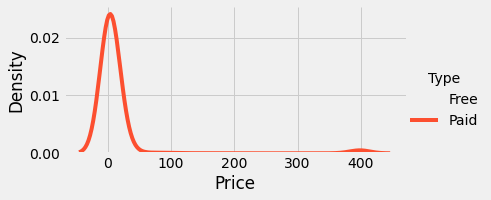

In [76]:
kde_plot('Price')

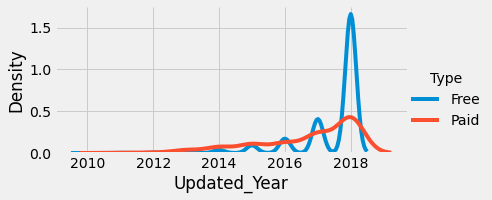

In [77]:
kde_plot('Updated_Year')

* scatter plot Analysis

In [78]:
scatters('Price', 'Updated_Year')

In [79]:
scatters('Size', 'Rating')

In [80]:
scatters('Size', 'Installs')

In [81]:
scatters('Updated_Month', 'Installs')

In [82]:
scatters('Reviews', 'Rating')

In [83]:
scatters('Rating', 'Price')

 * violin plot Analysis

In [84]:
violin('Rating')

In [85]:
violin('Reviews')

In [86]:
violin('Size')

In [87]:
violin('Installs')

In [88]:
violin('Price')

In [89]:
violin('Updated_Month')

In [90]:
violin('Updated_Year')

Text(0.5, 1.0, 'Time series plot of Last Updates')

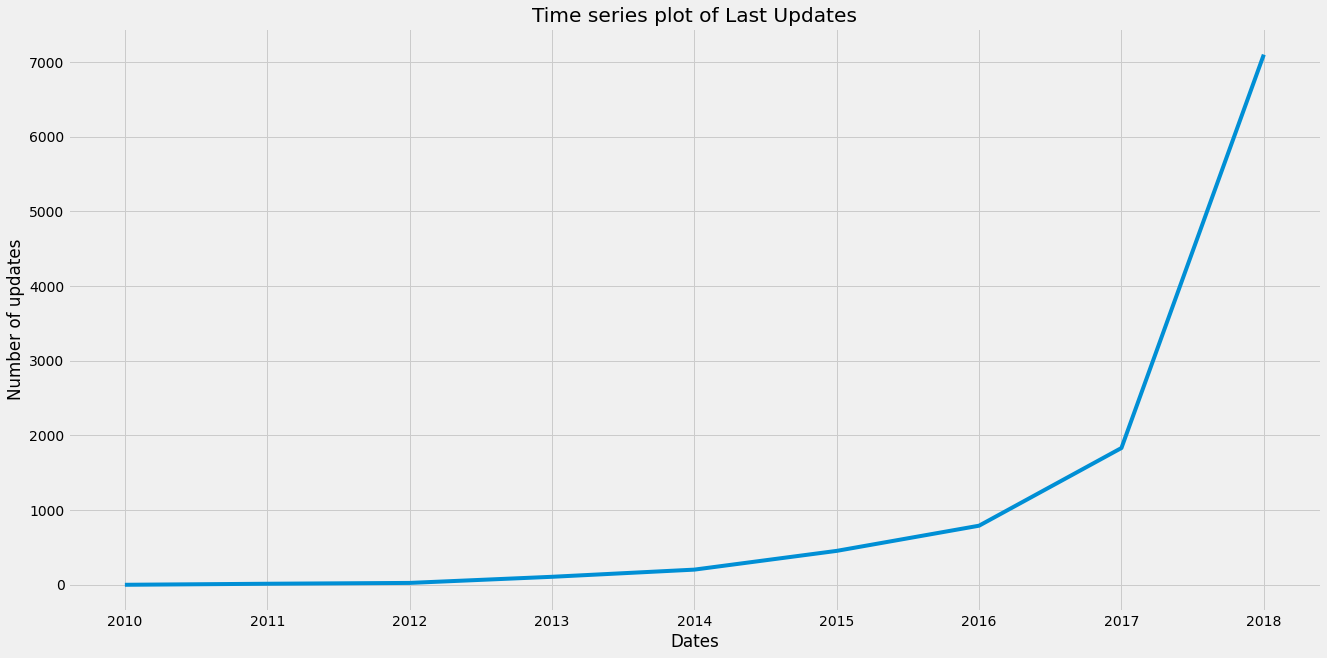

In [91]:
freq= pd.Series()
freq=data['Updated_Year'].value_counts()
freq.plot()
plt.xlabel("Dates")
plt.ylabel("Number of updates")
plt.title("Time series plot of Last Updates")

<a id = '9.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Check Co-relation</strong></p>


In [92]:
corelation = pd.DataFrame({'corelation' : data.corr()["Rating"].abs().sort_values(ascending=False)[1:]})
corelation

corelation
Updated_Year     0.124140
Size             0.062857
Reviews          0.062539
Installs         0.048146
Price            0.013011
Updated_Day      0.010116
Updated_Month    0.010055

<AxesSubplot:>

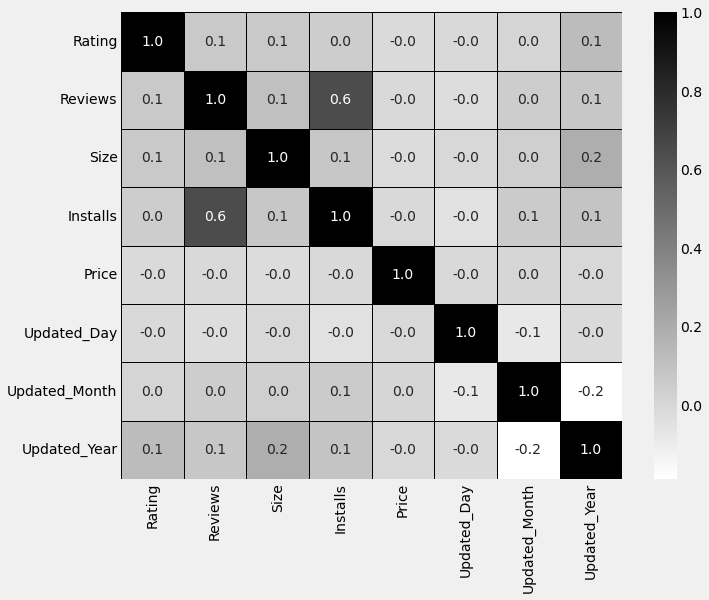

In [93]:
plt.figure(figsize=(10,8))
corelation = data.corr()
sns.heatmap(corelation,annot=True ,linewidths=0.5,linecolor="black", fmt= '.1f' ,cmap='gray_r')

<a id = '6.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Separate dependent & independent features</strong></p>

In [94]:
y=data['Rating']
X=num_data
cols=X.columns
cols

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Updated_Day',
       'Updated_Month', 'Updated_Year'],
      dtype='object')

<a id = '7.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Splitting Dataset</strong></p>


In [95]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=0)

In [96]:
# Import Libraries
from sklearn.preprocessing import StandardScaler

In [97]:
#Creating a StandardScaler object to normalize the X train and test set feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)


<a id = '13.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Defining function For ML model</strong></p>

In [98]:
from sklearn.ensemble import GradientBoostingRegressor

In [99]:
def predict(ml_model):          
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    print('\n')
    y_prediction=model.predict(X_test)
    print('Testing score : {}'.format(model.score(X_test,y_prediction)))
    print('\n')

    print('predictions are: \n {}'.format(y_prediction[:10]))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))


<a id = '12.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Gradient Boosting</strong></p> 


In [100]:
predict(GradientBoostingRegressor())

Training score : 0.999364494138375


Testing score : 1.0


predictions are: 
 [4.29999868 3.90012261 4.29999868 4.10007835 4.79969327 4.49994236
 4.59982006 4.49994966 4.29999677 4.29999677]


r2 score: 0.9976638412380321
MAE: 0.0021169753613144078
MSE: 0.0006111188183309164
RMSE: 0.02472081750935669


<a id = '9.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>If you found this notebook helpful or you just liked it , some upvotes would be very much appreciated - That will keep me motivated to update it on a regular basis</strong></p>
